## Seaborn
Seaborn es realmente solo un wrapper de matplotlib. Agrega estilos para que las visualizaciones de datos predeterminadas sean mucho más atractivas visualmente y facilita la creación de tipos específicos de gráficos complicados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# generamos un dataframe aleatorio
np.random.seed(1234) # usamos una semilla para poder replicar resultados

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')


Vamos a ver cómo se ven los histogramas de estas dos variables cuando los trazamos uno al lado del otro.

Podemos establecer alpha igual a 0.7 para que los histogramas no se cubran entre sí.

Para el parámetro bins, en lugar de usar un entero que denote el número de contenedores que queremos, también podemos pasar una secuencia específica usando np.arange para especificar los contenedores que queremos usar.

Esto es útil cuando queremos trazar dos histogramas en la misma figura para asegurarnos de que los tamaños de los contenedores sean equivalentes para ambos histogramas.

También añadiremos etiquetas para que podamos ver a qué variable pertenece cada histograma usando una leyenda.

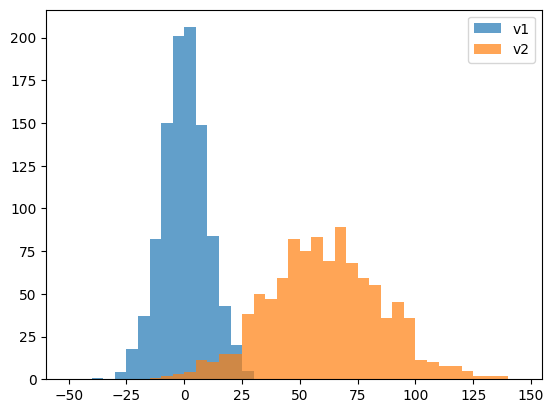

In [4]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Vamos a visualizar estos histogramas de una manera diferente.

Primero, pasaremos ambas series v1 y v2 en una lista y estableceremos histtype en 'barstacked'.

Configurar density en True normalizará el histograma para formar una densidad de probabilidad.

A continuación, crearemos una variable v3, que es la combinación de v1 y v2.

Usaremos v3 para trazar un gráfico de estimación de densidad de kernel (KDE) sobre el histograma apilado. El gráfico de estimación de densidad de kernel estima la función de densidad de probabilidad de la variable v3. Trazarlo sobre los histogramas apilados de v1 y v2 nos permitirá ver la relación entre estas dos visualizaciones.

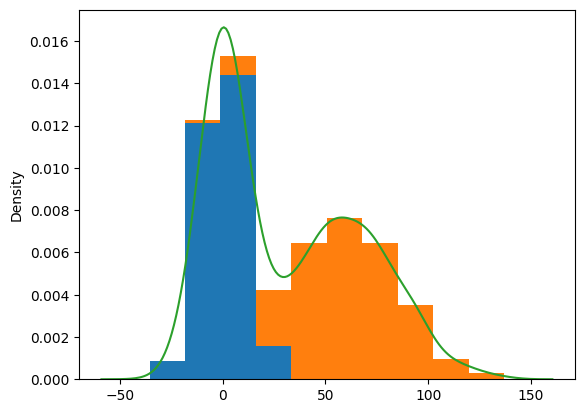

In [5]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

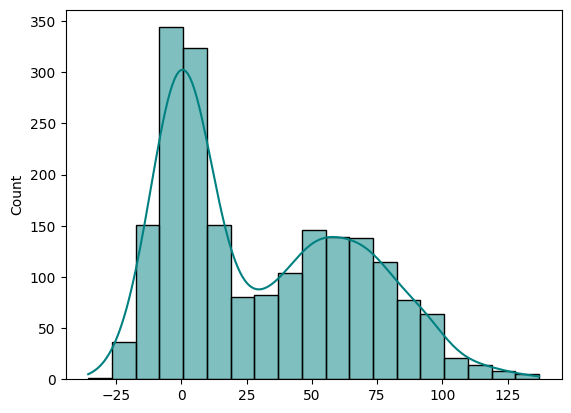

In [6]:
plt.figure()

sns.histplot(v3, color='Teal', kde=True);

#### Joinplots
Para crear un jointplot, simplemente escribimos sns.jointplot y pasamos las dos series, v1 y v2.

Establecer alpha en 0.4 ayudará a visualizar los puntos superpuestos. El jointplot nos permite visualizar la distribución de las dos variables individualmente, así como las relaciones entre las variables.

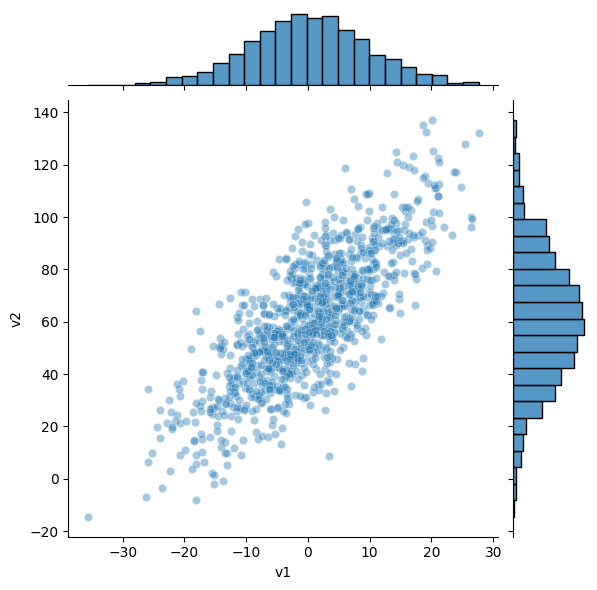

In [7]:
sns.jointplot(x=v1, y=v2, alpha=0.4);

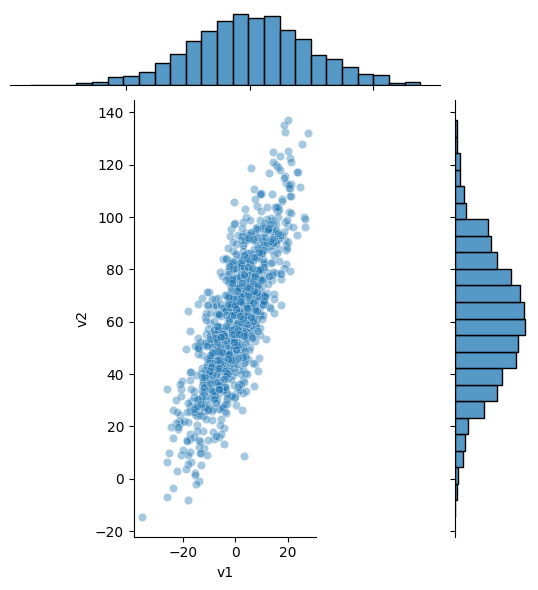

In [9]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

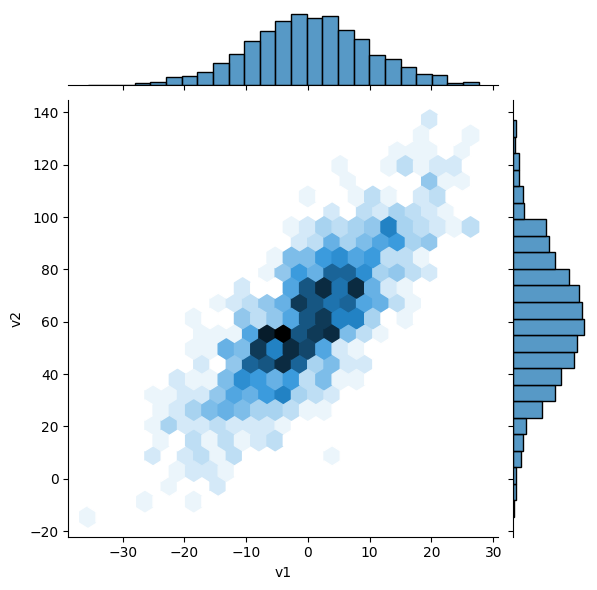

In [8]:
sns.jointplot(x=v1, y=v2, kind='hex');

Con sns.set_style('white') todos los gráficos siguientes tendrán la cuadrícula gris desactivada.

Ahora crearemos un jointplot como antes, excepto que esta vez, configuraremos el tipo (kind) en 'kde'.

Finalmente, configuraremos el parámetro space en 0, lo que trazará las distribuciones marginales directamente en el borde del gráfico de dispersión. Podemos ver que Seaborn ofrece opciones integradas para una fácil personalización y nos proporciona gráficos fáciles de crear y visualmente atractivos para explorar las distribuciones de nuestros datos.

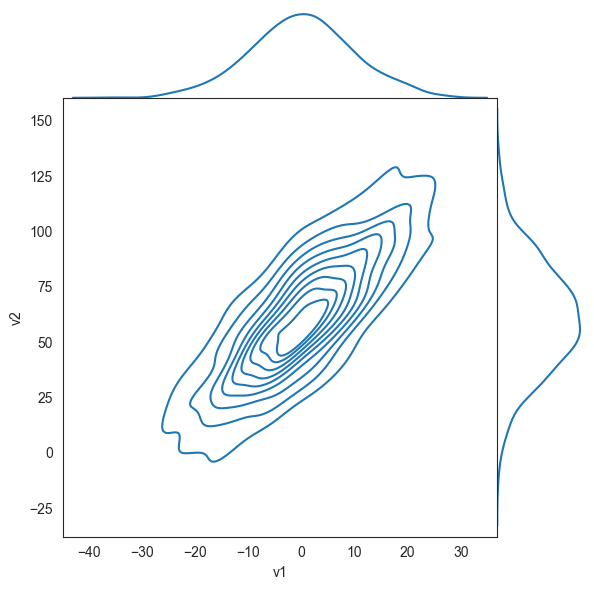

In [10]:
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

### Iris dataset con seaborn

In [11]:
iris = pd.read_csv('../../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


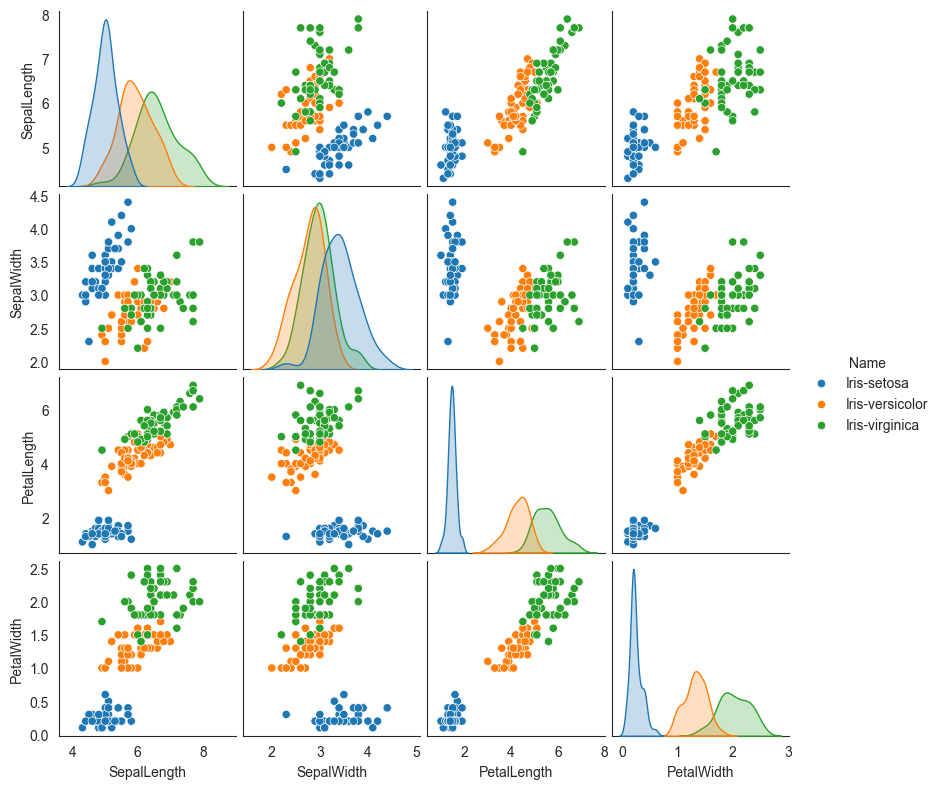

In [12]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

Al observar el gráfico de pares (pair plot), es evidente que hay algunos agrupamientos en el conjunto de datos. Parece que la longitud del pétalo y el ancho del pétalo son buenas opciones para separar las observaciones, mientras que el ancho del sépalo no es un buen separador.

Para trazar un gráfico de violín junto a un gráfico de enjambre (swarm plot), que puedes considerar como un gráfico de dispersión para datos categóricos.

Primero, crearemos una nueva figura y un subplot. Luego, crearemos el gráfico de enjambre, pasando Name y PetalLength, y los datos, que son el DataFrame de iris. Para el siguiente subplot, crearemos el gráfico de violín, pasando nuevamente Name, PetalLength y el DataFrame de iris.

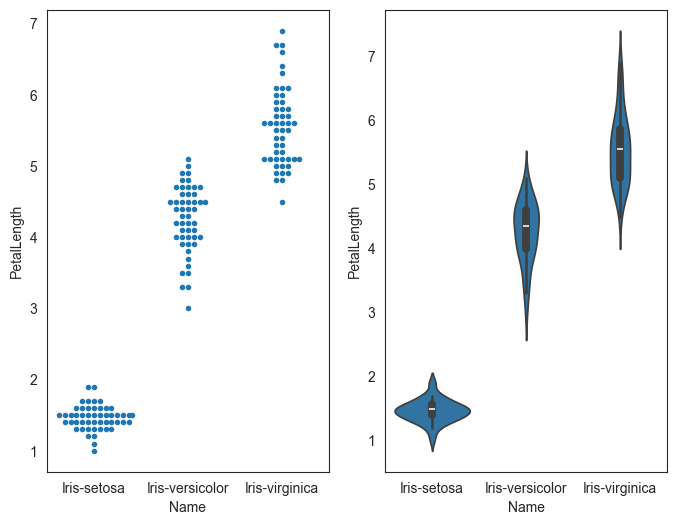

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='Name', y='PetalLength', data=iris, size=4);
plt.subplot(122)
sns.violinplot(x='Name', y='PetalLength', data=iris);

Al observar el swarmplot, cada especie tiene su propia columna y la longitud del pétalo de cada observación se muestra. Los valores más comunes aparecen como las partes anchas del grupo, similar a un histograma.

El violinplot es como un diagrama de caja con una estimación de densidad de kernel rotada a cada lado.

Los gráficos de violín transmiten más información que los diagramas de caja y son capaces de mostrar fenómenos particulares dentro de la distribución que los diagramas de caja no pueden, como la multimodalidad. Seaborn es una biblioteca que no solo añade nuevos estilos y aspectos visuales, sino que también introduce nuevas funcionalidades, como gráficos conjuntos (joint plots), gráficos de matriz de dispersión (scatter matrix plots) y gráficos de violín (violin plots).